# Optimizing Model

## Optimizer Algorithms and Learning Rate

### Gradient descent vs Adaptive

We already get good fit by using Adam algorithms which belongs to family of `Adaptive` algorithms.

How about `Stochastic gradient descent` (SGD) which belongs to family of `Gradient descent optimizers`?

`SGD` is an improved version of batch gradient descent. Many people prefer `SGD` as the optimizer, because it can bring to better model if `learning rate` and `schedule` are fine tuned.

The problem of SGD is that the updates are frequent and with a high variance. A solution to this problem is to slowly decrease the learning rate value. [Link](https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e)  

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing import MinMaxScaler, StandardScaler
from   tensorflow.keras.losses import MeanAbsolutePercentageError
from   tensorflow.keras.optimizers import SGD

# FUNCTIONS
from functions import *

## Import data

In [2]:
filename_alldata = "data/_nanocomposite_data.csv"
alldata = pd.read_csv(filename_alldata, index_col=None, header=0)
# Drop columns which are not used for now
alldata_clean = alldata.drop(['polymer_p2', 'ratio_1_2','filler_2','wt_l2','owner','foaming'], axis=1)
alldata_clean = mapStringToNum(alldata_clean)

## Prepare Dataset for TensorFlow

### Scaling X and Y data
X data might not need scaling as the range of values is not high.

In [3]:
X_scaler = MinMaxScaler(feature_range=(0, 1))
Y_scaler = superHighVariationScaler() 

### Splitting data to training and testing sets

In [4]:
training_data, testing_data = train_test_split(alldata_clean, test_size=0.2, random_state=25)

In [5]:
# Split into input features (X) and output labels (Y) variables
X_training = training_data.drop('conductivity', axis=1).values
Y_training = training_data[['conductivity']].values

# Pull out columns for X (data to train with) and Y (value to predict)
X_testing = testing_data.drop('conductivity', axis=1).values
Y_testing = testing_data[['conductivity']].values

# Scale both the training inputs and outputs
X_scaled_training = X_scaler.fit_transform(X_training)
Y_scaled_training = Y_scaler.fit_transform(Y_training)

# It's very important that the training and test data are scaled with the same scaler.
X_scaled_testing = X_scaler.transform(X_testing)
Y_scaled_testing = Y_scaler.transform(Y_testing)

# Model build with `SGD` optimizer

In [6]:
# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation="relu", input_dim=3))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="linear"))

# tf.keras.optimizers.schedules.InverseTimeDecay => Does not work well
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
                initial_learning_rate = 0.00001, decay_steps = 100000)

model.compile(loss=MeanAbsolutePercentageError(), optimizer=SGD(learning_rate=lr_schedule) )

In [7]:
history = model.fit(X_scaled_training, Y_scaled_training, 
                    validation_data=(X_scaled_testing, Y_scaled_testing), 
                    epochs=1000, batch_size=64)

Epoch 1/1000
63/63 [==============================] - 1s 5ms/step - loss: 112.6407 - val_loss: 102.9476
Epoch 2/1000
63/63 [==============================] - 0s 3ms/step - loss: 104.0197 - val_loss: 117.9055
Epoch 3/1000
63/63 [==============================] - 0s 3ms/step - loss: 107.4331 - val_loss: 102.6370
Epoch 4/1000
63/63 [==============================] - 0s 3ms/step - loss: 108.7485 - val_loss: 102.2378
Epoch 5/1000
63/63 [==============================] - 0s 3ms/step - loss: 108.8083 - val_loss: 102.7641
Epoch 6/1000
63/63 [==============================] - 0s 3ms/step - loss: 104.4897 - val_loss: 109.2326
Epoch 7/1000
63/63 [==============================] - 0s 3ms/step - loss: 106.3120 - val_loss: 101.1502
Epoch 8/1000
63/63 [==============================] - 0s 3ms/step - loss: 104.4640 - val_loss: 100.4339
Epoch 9/1000
63/63 [==============================] - 0s 3ms/step - loss: 104.5321 - val_loss: 105.6509
Epoch 10/1000
63/63 [==============================] - 0s 3ms/st

63/63 [==============================] - 0s 3ms/step - loss: 83.8555 - val_loss: 84.0535
Epoch 81/1000
63/63 [==============================] - 0s 3ms/step - loss: 80.6011 - val_loss: 91.4348
Epoch 82/1000
63/63 [==============================] - 0s 3ms/step - loss: 82.9421 - val_loss: 99.1335
Epoch 83/1000
63/63 [==============================] - 0s 3ms/step - loss: 82.3840 - val_loss: 83.3914
Epoch 84/1000
63/63 [==============================] - 0s 3ms/step - loss: 106.5472 - val_loss: 90.4534
Epoch 85/1000
63/63 [==============================] - 0s 3ms/step - loss: 85.0938 - val_loss: 80.2147
Epoch 86/1000
63/63 [==============================] - 0s 3ms/step - loss: 82.3594 - val_loss: 82.4998
Epoch 87/1000
63/63 [==============================] - 0s 3ms/step - loss: 81.4875 - val_loss: 78.3356
Epoch 88/1000
63/63 [==============================] - 0s 3ms/step - loss: 80.4201 - val_loss: 80.7585
Epoch 89/1000
63/63 [==============================] - 0s 3ms/step - loss: 80.8875 - v

63/63 [==============================] - 0s 3ms/step - loss: 73.0291 - val_loss: 78.6588
Epoch 160/1000
63/63 [==============================] - 0s 3ms/step - loss: 78.9376 - val_loss: 78.3776
Epoch 161/1000
63/63 [==============================] - 0s 3ms/step - loss: 101.3356 - val_loss: 85.3666
Epoch 162/1000
63/63 [==============================] - 0s 3ms/step - loss: 84.5127 - val_loss: 86.1730
Epoch 163/1000
63/63 [==============================] - 0s 3ms/step - loss: 80.1997 - val_loss: 72.6909
Epoch 164/1000
63/63 [==============================] - 0s 3ms/step - loss: 77.5271 - val_loss: 76.4287
Epoch 165/1000
63/63 [==============================] - 0s 3ms/step - loss: 76.2913 - val_loss: 79.3776
Epoch 166/1000
63/63 [==============================] - 0s 3ms/step - loss: 76.1916 - val_loss: 76.2035
Epoch 167/1000
63/63 [==============================] - 0s 3ms/step - loss: 78.5612 - val_loss: 75.4228
Epoch 168/1000
63/63 [==============================] - 0s 3ms/step - loss: 75

63/63 [==============================] - 0s 3ms/step - loss: 70.8034 - val_loss: 73.7091
Epoch 238/1000
63/63 [==============================] - 0s 3ms/step - loss: 70.3917 - val_loss: 71.2184
Epoch 239/1000
63/63 [==============================] - 0s 3ms/step - loss: 68.0776 - val_loss: 69.7825
Epoch 240/1000
63/63 [==============================] - 0s 3ms/step - loss: 67.6954 - val_loss: 70.4190
Epoch 241/1000
63/63 [==============================] - 0s 3ms/step - loss: 67.3309 - val_loss: 63.3049
Epoch 242/1000
63/63 [==============================] - 0s 3ms/step - loss: 68.5227 - val_loss: 65.7426
Epoch 243/1000
63/63 [==============================] - 0s 3ms/step - loss: 70.8121 - val_loss: 66.4655
Epoch 244/1000
63/63 [==============================] - 0s 3ms/step - loss: 74.3656 - val_loss: 69.3658
Epoch 245/1000
63/63 [==============================] - 0s 3ms/step - loss: 67.3215 - val_loss: 76.0716
Epoch 246/1000
63/63 [==============================] - 0s 3ms/step - loss: 70.

Epoch 316/1000
63/63 [==============================] - 0s 3ms/step - loss: 47.4254 - val_loss: 47.5726
Epoch 317/1000
63/63 [==============================] - 0s 3ms/step - loss: 46.0384 - val_loss: 54.0484
Epoch 318/1000
63/63 [==============================] - 0s 3ms/step - loss: 48.1406 - val_loss: 51.1908
Epoch 319/1000
63/63 [==============================] - 0s 3ms/step - loss: 51.7917 - val_loss: 49.4403
Epoch 320/1000
63/63 [==============================] - 0s 3ms/step - loss: 49.4345 - val_loss: 43.0015
Epoch 321/1000
63/63 [==============================] - 0s 3ms/step - loss: 43.8675 - val_loss: 46.8267
Epoch 322/1000
63/63 [==============================] - 0s 3ms/step - loss: 47.0487 - val_loss: 98.1426
Epoch 323/1000
63/63 [==============================] - 0s 3ms/step - loss: 46.0221 - val_loss: 47.0087
Epoch 324/1000
63/63 [==============================] - 0s 3ms/step - loss: 45.6062 - val_loss: 40.2487
Epoch 325/1000
63/63 [==============================] - 0s 3ms/s

Epoch 395/1000
63/63 [==============================] - 0s 3ms/step - loss: 42.9821 - val_loss: 41.5496
Epoch 396/1000
63/63 [==============================] - 0s 3ms/step - loss: 42.5288 - val_loss: 41.4338
Epoch 397/1000
63/63 [==============================] - 0s 3ms/step - loss: 43.7955 - val_loss: 44.1368
Epoch 398/1000
63/63 [==============================] - 0s 3ms/step - loss: 41.3969 - val_loss: 40.3554
Epoch 399/1000
63/63 [==============================] - 0s 4ms/step - loss: 42.1951 - val_loss: 40.8687
Epoch 400/1000
63/63 [==============================] - 0s 4ms/step - loss: 41.3752 - val_loss: 45.6823
Epoch 401/1000
63/63 [==============================] - 0s 3ms/step - loss: 42.7695 - val_loss: 50.0080
Epoch 402/1000
63/63 [==============================] - 0s 3ms/step - loss: 42.8874 - val_loss: 38.0321
Epoch 403/1000
63/63 [==============================] - 0s 3ms/step - loss: 42.4504 - val_loss: 39.7073
Epoch 404/1000
63/63 [==============================] - 0s 3ms/s

Epoch 474/1000
63/63 [==============================] - 0s 3ms/step - loss: 43.3494 - val_loss: 39.8985
Epoch 475/1000
63/63 [==============================] - 0s 3ms/step - loss: 40.8644 - val_loss: 37.2906
Epoch 476/1000
63/63 [==============================] - 0s 3ms/step - loss: 44.3911 - val_loss: 70.2509
Epoch 477/1000
63/63 [==============================] - 0s 3ms/step - loss: 44.1301 - val_loss: 38.8308
Epoch 478/1000
63/63 [==============================] - 0s 3ms/step - loss: 40.3589 - val_loss: 43.5520
Epoch 479/1000
63/63 [==============================] - 0s 3ms/step - loss: 40.9806 - val_loss: 39.0965
Epoch 480/1000
63/63 [==============================] - 0s 3ms/step - loss: 40.2933 - val_loss: 48.3497
Epoch 481/1000
63/63 [==============================] - 0s 3ms/step - loss: 42.5210 - val_loss: 36.6680
Epoch 482/1000
63/63 [==============================] - 0s 3ms/step - loss: 40.2190 - val_loss: 43.4994
Epoch 483/1000
63/63 [==============================] - 0s 3ms/s

Epoch 553/1000
63/63 [==============================] - 0s 3ms/step - loss: 39.7617 - val_loss: 37.0403
Epoch 554/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.4519 - val_loss: 50.0204
Epoch 555/1000
63/63 [==============================] - 0s 5ms/step - loss: 41.5253 - val_loss: 73.0186
Epoch 556/1000
63/63 [==============================] - 0s 3ms/step - loss: 40.7928 - val_loss: 36.1196
Epoch 557/1000
63/63 [==============================] - 0s 3ms/step - loss: 38.3692 - val_loss: 41.5177
Epoch 558/1000
63/63 [==============================] - 0s 3ms/step - loss: 39.1834 - val_loss: 36.3073
Epoch 559/1000
63/63 [==============================] - 0s 3ms/step - loss: 40.6764 - val_loss: 39.0555
Epoch 560/1000
63/63 [==============================] - 0s 4ms/step - loss: 39.4385 - val_loss: 42.2133
Epoch 561/1000
63/63 [==============================] - 0s 3ms/step - loss: 38.8065 - val_loss: 56.4399
Epoch 562/1000
63/63 [==============================] - 0s 3ms/s

Epoch 632/1000
63/63 [==============================] - 0s 5ms/step - loss: 36.5704 - val_loss: 40.4787
Epoch 633/1000
63/63 [==============================] - 0s 3ms/step - loss: 41.7089 - val_loss: 38.3211
Epoch 634/1000
63/63 [==============================] - 0s 3ms/step - loss: 39.2706 - val_loss: 37.0178
Epoch 635/1000
63/63 [==============================] - 0s 3ms/step - loss: 41.1043 - val_loss: 40.9986
Epoch 636/1000
63/63 [==============================] - 0s 3ms/step - loss: 38.5323 - val_loss: 48.1918
Epoch 637/1000
63/63 [==============================] - 0s 3ms/step - loss: 39.0825 - val_loss: 36.0917
Epoch 638/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.7713 - val_loss: 39.5813
Epoch 639/1000
63/63 [==============================] - 0s 3ms/step - loss: 40.0189 - val_loss: 41.1868
Epoch 640/1000
63/63 [==============================] - 0s 3ms/step - loss: 40.1914 - val_loss: 52.6497
Epoch 641/1000
63/63 [==============================] - 0s 3ms/s

Epoch 711/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.8630 - val_loss: 41.3539
Epoch 712/1000
63/63 [==============================] - 0s 4ms/step - loss: 38.4853 - val_loss: 37.4035
Epoch 713/1000
63/63 [==============================] - 0s 3ms/step - loss: 39.5910 - val_loss: 36.0592
Epoch 714/1000
63/63 [==============================] - 0s 3ms/step - loss: 38.7745 - val_loss: 37.6135
Epoch 715/1000
63/63 [==============================] - 0s 3ms/step - loss: 38.6725 - val_loss: 40.2502
Epoch 716/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.9216 - val_loss: 45.0299
Epoch 717/1000
63/63 [==============================] - 0s 3ms/step - loss: 38.8443 - val_loss: 36.3866
Epoch 718/1000
63/63 [==============================] - 0s 3ms/step - loss: 38.9615 - val_loss: 39.0229
Epoch 719/1000
63/63 [==============================] - 0s 3ms/step - loss: 38.2829 - val_loss: 37.1817
Epoch 720/1000
63/63 [==============================] - 0s 3ms/s

Epoch 790/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.7297 - val_loss: 39.1797
Epoch 791/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.9343 - val_loss: 36.7104
Epoch 792/1000
63/63 [==============================] - 0s 3ms/step - loss: 35.9578 - val_loss: 43.2699
Epoch 793/1000
63/63 [==============================] - 0s 3ms/step - loss: 38.0082 - val_loss: 38.1802
Epoch 794/1000
63/63 [==============================] - 0s 3ms/step - loss: 36.8525 - val_loss: 52.2047
Epoch 795/1000
63/63 [==============================] - 0s 3ms/step - loss: 36.7484 - val_loss: 37.2585
Epoch 796/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.2960 - val_loss: 45.2787
Epoch 797/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.2384 - val_loss: 37.9831
Epoch 798/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.5361 - val_loss: 37.5981
Epoch 799/1000
63/63 [==============================] - 0s 3ms/s

Epoch 869/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.6011 - val_loss: 35.5786
Epoch 870/1000
63/63 [==============================] - 0s 3ms/step - loss: 36.8504 - val_loss: 36.0333
Epoch 871/1000
63/63 [==============================] - 0s 3ms/step - loss: 36.3601 - val_loss: 37.0914
Epoch 872/1000
63/63 [==============================] - 0s 3ms/step - loss: 38.1753 - val_loss: 39.2302
Epoch 873/1000
63/63 [==============================] - 0s 3ms/step - loss: 36.8189 - val_loss: 37.8585
Epoch 874/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.3760 - val_loss: 38.2970
Epoch 875/1000
63/63 [==============================] - 0s 3ms/step - loss: 36.5992 - val_loss: 36.3362
Epoch 876/1000
63/63 [==============================] - 0s 3ms/step - loss: 35.8954 - val_loss: 35.5635
Epoch 877/1000
63/63 [==============================] - 0s 3ms/step - loss: 36.4353 - val_loss: 40.8072
Epoch 878/1000
63/63 [==============================] - 0s 3ms/s

Epoch 948/1000
63/63 [==============================] - 0s 3ms/step - loss: 35.4536 - val_loss: 42.5862
Epoch 949/1000
63/63 [==============================] - 0s 3ms/step - loss: 36.0158 - val_loss: 38.9712
Epoch 950/1000
63/63 [==============================] - 0s 3ms/step - loss: 36.1591 - val_loss: 36.9972
Epoch 951/1000
63/63 [==============================] - 0s 3ms/step - loss: 35.6806 - val_loss: 35.3276
Epoch 952/1000
63/63 [==============================] - 0s 3ms/step - loss: 35.1855 - val_loss: 49.7014
Epoch 953/1000
63/63 [==============================] - 0s 3ms/step - loss: 37.2230 - val_loss: 37.5922
Epoch 954/1000
63/63 [==============================] - 0s 3ms/step - loss: 36.6352 - val_loss: 36.9205
Epoch 955/1000
63/63 [==============================] - 0s 3ms/step - loss: 35.2652 - val_loss: 38.4924
Epoch 956/1000
63/63 [==============================] - 0s 3ms/step - loss: 34.6160 - val_loss: 37.9318
Epoch 957/1000
63/63 [==============================] - 0s 3ms/s

## Plotting predicting vs testing data

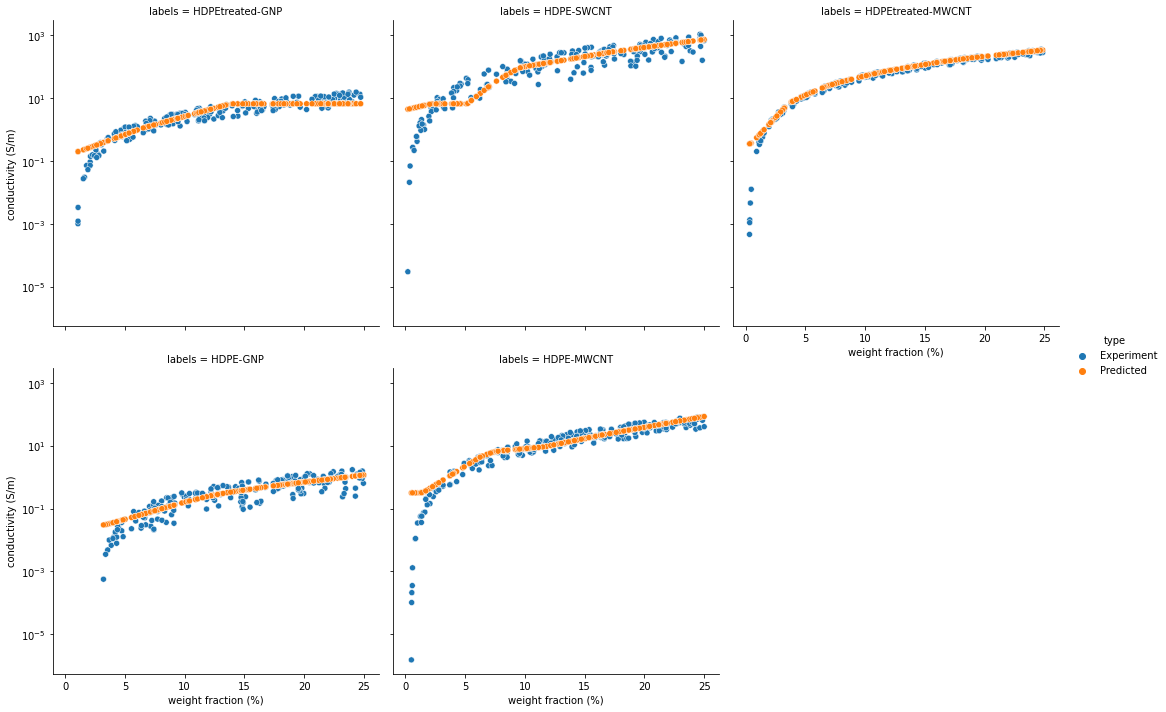

In [8]:
# Calculate predictions
PredValSet = model.predict(X_scaled_testing)
PredValSet2 = Y_scaler.inverse_transform(PredValSet)

compdata = testing_data.copy()
compdata = mapNumToString (compdata)

compdata['labels']    = compdata['polymer_1'] + "-" + compdata['filler_1']
compdata['type'] = 'Experiment'
compdata2 = compdata.copy()
compdata2['type'] = 'Predicted'
compdata2['conductivity'] = PredValSet2

compdata = compdata.append(compdata2, ignore_index = True)

g = sns.relplot(data=compdata ,x="wt_l1", y ="conductivity", hue="type", col="labels", kind="scatter", col_wrap =3  );
g.set_xlabels("weight fraction (%)");
g.set_ylabels("conductivity (S/m)");
g.set(yscale="log");

# Extrapolation: Estimate higher wt (>25%)

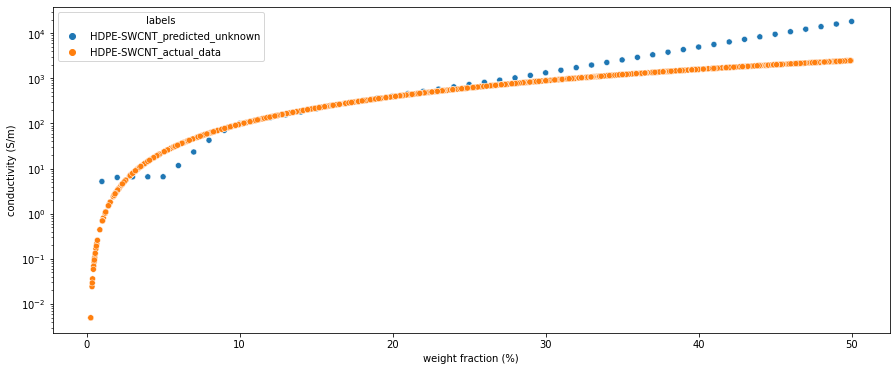

In [9]:
filename_unknowndata7 = "data-evaluation/HDPE_SWCNT_data-set-7.csv"
unknowndata7 = pd.read_csv(filename_unknowndata7, index_col=None, header=0)
unknowndata7.drop(['polymer_p2', 'ratio_1_2','filler_2','wt_l2','owner','foaming'], axis=1, inplace=True)   #,'foaming'
unknowndata7_clean = unknowndata7.copy()
unknowndata7_clean = mapStringToNum(unknowndata7_clean)
# Pull out columns for X (data to train with) and Y (value to predict)
X_unknowndata7 = unknowndata7_clean.drop('conductivity', axis=1).values
X_scaled_unknowndata7 = X_scaler.transform(X_unknowndata7)
# Calculate predictions
PredValSet_unknowndata7 = model.predict(X_scaled_unknowndata7)
PredValSet_unknowndata72 = Y_scaler.inverse_transform(PredValSet_unknowndata7)
compdata = unknowndata7.copy()
compdata['labels']    = compdata['polymer_1'] + "-" + compdata['filler_1'] + "_predicted_unknown"
compdata['conductivity'] = PredValSet_unknowndata72
######################
filename_data8 = "data-evaluation/HDPE_SWCNT_data-set-8.csv"
data8 = pd.read_csv(filename_data8, index_col=None, header=0)
data8['labels']= data8['polymer_1'] + "-" + data8['filler_1'] + "_actual_data"
######################
compdata = compdata.append(data8, ignore_index = True)

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xlabel("weight fraction (%)")
plt.ylabel("conductivity (S/m)")
plt.yscale("log")
g = sns.scatterplot(data=compdata ,x="wt_l1", y ="conductivity", hue="labels" , ax = ax ,markers=["-","x"] );

# Predicting unknow case - treated HDPE + SWCNT

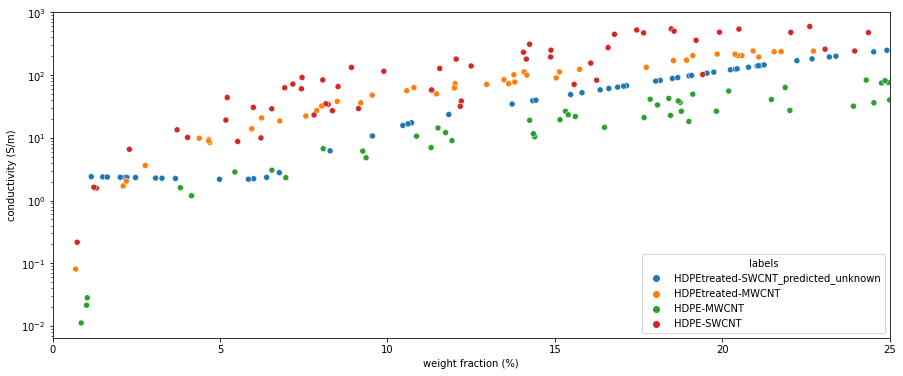

In [10]:
filename_HDPEtreated_SWCNT = "data-evaluation/HDPEtreated_SWCNT_data-set-6.csv"
data_HDPEtreated_SWCNT = pd.read_csv(filename_HDPEtreated_SWCNT, index_col=None, header=0)
data_HDPEtreated_SWCNT_clean = data_HDPEtreated_SWCNT.drop(
                                    ['polymer_p2', 'ratio_1_2','filler_2','wt_l2','owner','foaming'], axis=1)
unknowndata = data_HDPEtreated_SWCNT_clean.copy()
unknowndata['conductivity'] = float("NaN")
unknowndata_clean = unknowndata.copy()
unknowndata_clean = mapStringToNum (unknowndata_clean)
# Pull out columns for X (data to train with) and Y (value to predict)
X_unknowndata = unknowndata_clean.drop('conductivity', axis=1).values
X_scaled_unknowndata = X_scaler.transform(X_unknowndata)
# Calculate predictions
PredValSet_unknowndata = model.predict(X_scaled_unknowndata)
PredValSet_unknowndata2 = Y_scaler.inverse_transform(PredValSet_unknowndata)
compdata = unknowndata.copy()
compdata['labels']    = compdata['polymer_1'] + "-" + compdata['filler_1'] + "_predicted_unknown"
compdata['conductivity'] = PredValSet_unknowndata2

alldata['labels']    = alldata['polymer_1'] + "-" + alldata['filler_1']
compdata1 = alldata[alldata['filler_1'] != "GNP" ].copy()

compdata = compdata.append(compdata1, ignore_index = True)

# reduce data rows to 5% (sparse data)
drop_indices = np.random.choice(compdata.index, int(np.ceil(len(compdata.index) * 0.95) ) , replace=False)
compdata_subset = compdata.drop(drop_indices)

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xlabel("weight fraction (%)")
plt.ylabel("conductivity (S/m)")
plt.yscale("log")
plt.xlim([0,25])
g = sns.scatterplot(data=compdata_subset ,x="wt_l1", y ="conductivity", hue="labels" , ax = ax );

# Conclusion

## Alternative optimizers

Although there is no large difference, these alternative optimizers and configuration are good to considers

### `SGD`
```python
model.compile(loss=tf.keras.losses.MeanAbsolutePercentageError(), 
                      optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, decay=1e-6) )
```
### `Adagrad`
```python
model.compile(loss=tf.keras.losses.MeanAbsolutePercentageError(),
                      optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01,initial_accumulator_value=1.0))
```
### `Adadelta`
```python
model.compile(loss=tf.keras.losses.MeanAbsolutePercentageError(),
                      optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0))
```


## Learning schedules

To controll learning schedules, we can use `LearningRateSchedule` such as 

### In cases of  `SGD`  these are best fit

```python
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay( 
                initial_learning_rate = 0.00001, decay_steps=1000, decay_rate=0.99, staircase=True)

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
                initial_learning_rate = 0.00001, decay_steps = 100000)
```

## Loss function

Because we need to carefully consider both extremely low and extremely high values of electrical conductivity, we need to calculate the __relative differences__ between `true value` and `predict value`. We could use their magnitude orders (by taking logarithm of the values). 

`tf.keras.losses.MeanAbsolutePercentageError` Formula:
```python
loss = 100 * abs((y_true - y_pred) / y_true)
```

There are a few choices available which work well for our problem. 